# Image Denoising with Autoencoders

## Task 1: Introduction and Importing Libraries
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [2]:
import numpy as np

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

%matplotlib inline

## Task 2: Data Preprocessing
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float')/255.0 #255.0 is the maximum pixel value 
x_test = x_test.astype('float')/255.0
x_train = np.reshape(x_train, (60000, 784)) #the number of examples: 60k and the number of pixels(features) per example: 784 = 28x28
x_test = np.reshape(x_test, (10000, 784)) #the number of examples: 10k

## Task 3: Adding Noise
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [4]:
x_train_noisy = x_train + np.random.rand(60000, 784)*0.9 #shape of the main training examples
x_test_noisy = x_test + np.random.rand(10000, 784)*0.9 #shape of the main test examples
x_train_noisy = np.clip(x_train_noisy, 0., 1.) #clipping the values since the picture is black and white
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

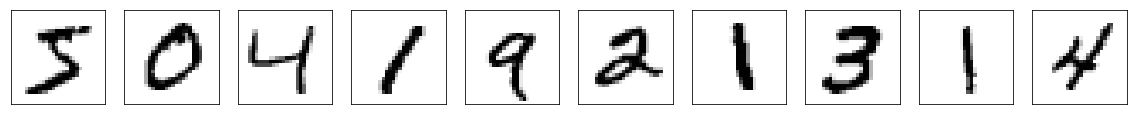

In [5]:
def plot(x, p, labels = False): #x and p are the image the prediction resepectively
    plt.figure(figsize = (20,2))
    for i in range(10): #10 images at a time
        plt.subplot(1,10,i+1) #one row and ten columns, the index for the subplot is i+1
        plt.imshow(x[i].reshape(28,28), cmap ='binary')
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(p[i])) #predictions will be the labels of the images
    plt.show()
    
plot(x_train, None)

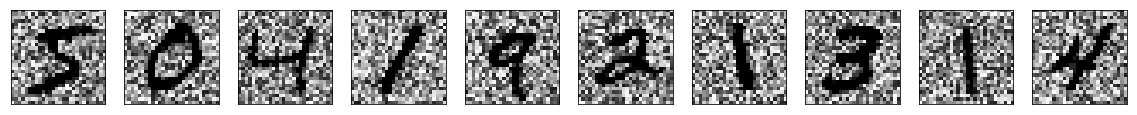

In [6]:
plot(x_train_noisy, None)

## Task 4: Building and Training a Classifier
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [7]:
classifier = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

classifier.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
classifier.fit(x_train, y_train, batch_size=512, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 88us/step - loss: 0.4392 - acc: 0.8767
Epoch 2/3
60000/60000 [==============================] - 5s 78us/step - loss: 0.1522 - acc: 0.9564
Epoch 3/3
60000/60000 [==============================] - 5s 76us/step - loss: 0.1021 - acc: 0.9700


In [8]:
loss, acc = classifier.evaluate(x_test, y_test)
print(acc)

10000/10000 [==============================] - 1s 129us/step
0.968


In [9]:
loss, acc = classifier.evaluate(x_test_noisy, y_test)
print(acc)

10000/10000 [==============================] - 1s 107us/step
0.1281


## Task 5: Building the Autoencoder
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [11]:
input_image = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_image) #forcing the number of nodes to be 64  
decoded = Dense(784, activation='sigmoid')(encoded) #expanding the nodes back to 784

autoencoder = Model(input_image, decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')


## Task 6: Training the Autoencoder
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [19]:
autoencoder.fit(
    x_train_noisy, x_train, epochs=100,
    batch_size=512, validation_split=0.2, verbose=False,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5),
        LambdaCallback(on_epoch_end=lambda e,l: print('{:.3f}'.format(l['val_loss']), end=' _ '))
    ]
)
print(' _ ')
print('Training is complete!')

0.156 _ 0.149 _ 0.143 _ 0.137 _ 0.132 _ 0.128 _ 0.125 _ 0.122 _ 0.120 _ 0.118 _ 0.116 _ 0.114 _ 0.113 _ 0.112 _ 0.111 _ 0.110 _ 0.109 _ 0.108 _ 0.108 _ 0.107 _ 0.106 _ 0.106 _ 0.106 _ 0.105 _ 0.105 _ 0.104 _ 0.104 _ 0.104 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.102 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _ 0.101 _  _ 
Training is complete!


## Task 7: Denoised Images
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [20]:
predictions = autoencoder.predict(x_test_noisy)

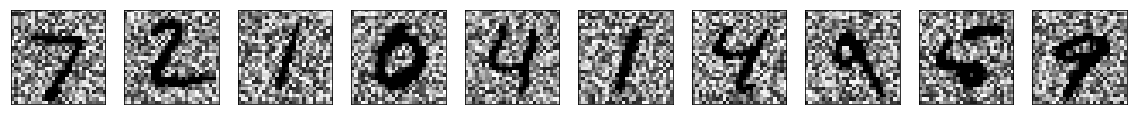

In [21]:
plot(x_test_noisy, None)

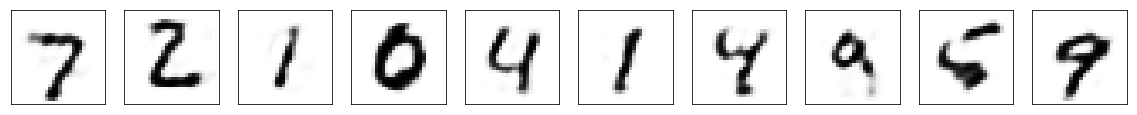

In [23]:
plot(predictions, None)

In [25]:
loss, acc = classifier.evaluate(predictions, y_test)
print(acc)

10000/10000 [==============================] - 1s 81us/step
0.951


## Task 8: Composite Model
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [27]:
input_image = Input(shape=(784,))
x = autoencoder(input_image)
y = classifier(x)

denoise_and_classify = Model(input_image, y)

In [28]:
predictions = denoise_and_classify.predict(x_test_noisy)

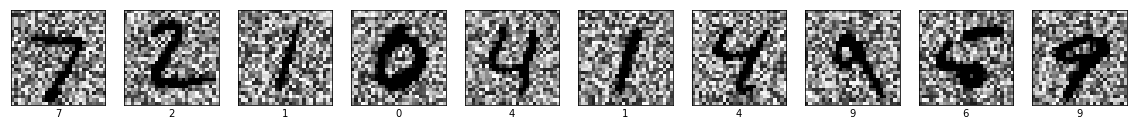

In [29]:
plot(x_test_noisy, predictions, True)

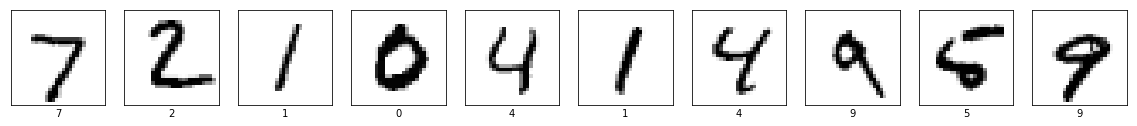

In [30]:
plot(x_test, to_categorical(y_test), True)